In [22]:
import requests
import re
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from io import BytesIO
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.preprocessing.image import img_to_array, load_img

headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}

In [23]:
def download_image(url):
    response = requests.get(url)
    img = load_img(BytesIO(response.content),target_size=(224,224))
    img_array = img_to_array(img) 
    resize_image = img_array /255.0
    return resize_image

In [42]:
img =download_image("https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1700656955045.jpg")

In [ ]:
print(img)

In [60]:
import matplotlib.pyplot as plt

def show_image(image_array, target="Image"):
    """
    Muestra una imagen usando matplotlib.

    Parámetros:
    - image_array: Un arreglo numpy de la imagen (puede ser de forma (H, W, 3) para RGB o (H, W) para escala de grises).
    - title: Un string opcional que será el título de la ventana de la imagen.
    """
    plt.imshow(image_array)
    plt.title("Image")
   # plt.axis('off')  # Ocultar los ejes
    
    plt.title(target)
    plt.show()

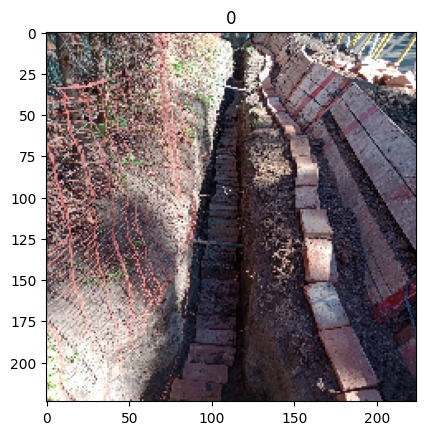

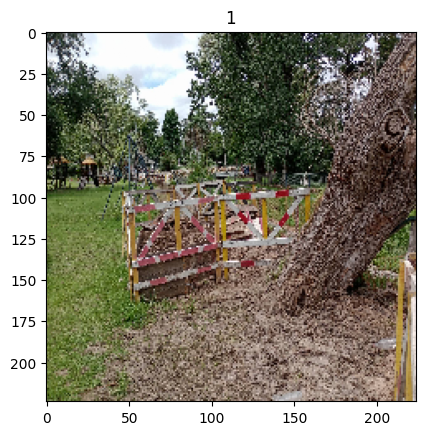

In [61]:
urls = [
   "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1700656955045.jpg",
   "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1705594035080.jpg"
]
X_train = [download_image(url) for url in urls]
y_train = [0,1]

for index, x_img in enumerate(X_train):
    show_image(x_img,y_train[index])

In [67]:
imagenes_controles_df = pd.read_csv('Imagenes_controles_etiquetados.csv')


,uri,tag,Vallado_,ID,Creado
0,https://field.voolks.com/api/containers/field-...,NaN,0,1,15/5/2024
1,https://field.voolks.com/api/containers/field-...,NaN,0,2,15/5/2024
2,https://field.voolks.com/api/containers/field-...,NaN,0,3,15/5/2024
3,https://field.voolks.com/api/containers/field-...,NaN,0,4,15/5/2024
4,https://field.voolks.com/api/containers/field-...,NaN,0,5,15/5/2024
...,...,...,...,...,...
3051,https://field.voolks.com/api/containers/field-...,NaN,1,4147,18/5/2024
3052,https://field.voolks.com/api/containers/field-...,NaN,1,4148,18/5/2024
3053,https://field.voolks.com/api/containers/field-...,NaN,1,4149,18/5/2024
3054,https://field.voolks.com/api/containers/field-...,NaN,1,4150,18/5/2024


In [154]:

imagenes_controles_df[ imagenes_controles_df['uri'].apply(lambda x:  x[-3:]=='jpg')]

,uri,tag,Vallado_,ID,Creado
0,https://field.voolks.com/api/containers/field-...,NaN,0,1,15/5/2024
1,https://field.voolks.com/api/containers/field-...,NaN,0,2,15/5/2024
2,https://field.voolks.com/api/containers/field-...,NaN,0,3,15/5/2024
3,https://field.voolks.com/api/containers/field-...,NaN,0,4,15/5/2024
4,https://field.voolks.com/api/containers/field-...,NaN,0,5,15/5/2024
...,...,...,...,...,...
3051,https://field.voolks.com/api/containers/field-...,NaN,1,4147,18/5/2024
3052,https://field.voolks.com/api/containers/field-...,NaN,1,4148,18/5/2024
3053,https://field.voolks.com/api/containers/field-...,NaN,1,4149,18/5/2024
3054,https://field.voolks.com/api/containers/field-...,NaN,1,4150,18/5/2024


In [ ]:
X_train_2000 = [download_image(url) for url in imagenes_controles_df['uri'][1000:2000]]
y_train_2000 = imagenes_controles_df['Vallado_'][1000:2000]

In [72]:
y_train = imagenes_controles_df['Vallado_']

NameError: name 'X_train_2000' is not defined

In [81]:

y_dataset = y_train_2000

In [170]:
with h5py.File('vallados_dataset2.hdf5','r') as f:
    X_train_1000_2000 = f['X_train'][:]
    X_test_1000_2000 = f['X_test'][:]
    y_train_1000_2000 = f['y_train'][:]
    y_test_1000_2000 = f['y_test'][:]


In [171]:
with h5py.File('vallados_dataset2.hdf5','r') as f:
    X_train_2000_3000 = f['X_train'][:]
    X_test_2000_3000 = f['X_test'][:]
    y_train_2000_3000 = f['y_train'][:]
    y_test_2000_3000 = f['y_test'][:]


In [173]:
y_train_1000.shapes

(1000,)

In [164]:
X_dataset = [] 
y_dataset = [] 
X_dataset.append(X_train_1000)

X_dataset.append(X_train_2000_3000)


y_dataset.append(y_train_1000)

y_dataset.append(y_train_2000_3000)


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_dataset,y_dataset,test_size=0.2,random_state=42,shuffle=True)

## Saving the dataset

In [166]:
import h5py

with h5py.File('vallados_dataset.hdf5','w') as f:
    f.create_dataset('X_train',data=X_train)
    f.create_dataset('X_test',data=X_test)
    f.create_dataset('y_train',data=y_train)
    f.create_dataset('y_test',data=y_test)


## Loading the dataset

In [14]:
import h5py
with h5py.File('vallados_dataset (1).hdf5','r') as f:
    X_dataset = f['X_dataset'][:]
    y_dataset = f['y_dataset'][:]

## Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dataset,y_dataset,test_size=0.2,random_state=42,shuffle=True)

In [6]:
y_train = y_train.reshape(-1,1)
y_train.shape

(2327, 1)

In [7]:
X_train.shape

(2327, 224, 224, 3)

## Model

In [16]:
model = keras.Sequential(
[
    keras.Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])),
    layers.Conv2D(32,2,activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
print(model.summary())

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,962,977 (45.64 MB)

 Trainable params: 11,962,977 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

None


## Training the model

In [9]:
history = model.fit(
    X_train,y_train,
    batch_size = 32,
    epochs = 10,
    verbose= True    
)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 547ms/step - accuracy: 0.6553 - loss: 0.9866
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 562ms/step - accuracy: 0.8307 - loss: 0.3924
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - accuracy: 0.8482 - loss: 0.3334
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.9247 - loss: 0.2009
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.9584 - loss: 0.1247
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 548ms/step - accuracy: 0.9951 - loss: 0.0275
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 549ms/step - accuracy: 0.9962 - loss: 0.0390
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 544ms/step - accuracy: 0.9942 - loss: 0.0292
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.9976 - loss: 0.0143
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 549ms/step - accuracy: 0.9986 - loss: 0.0098


## Evaluating the model

In [10]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8343 - loss: 0.5406
Test Loss: 0.5459142327308655
Test Accuracy: 0.831615149974823


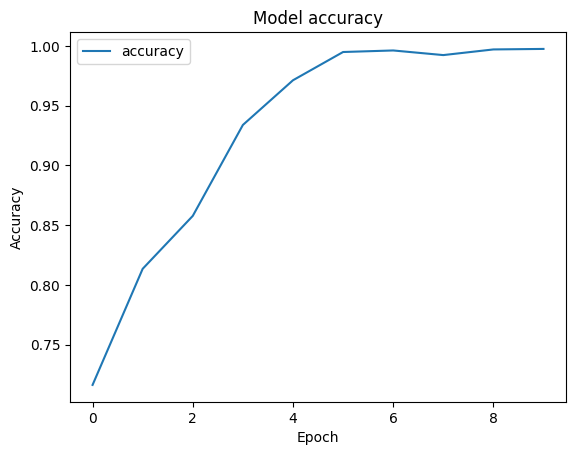

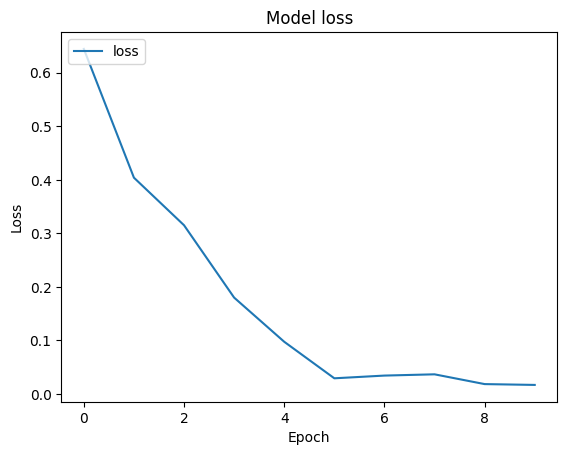

In [11]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [12]:
def load_and_prepare_image(image_path):
    # Descarga y carga la imagen
    img_array = download_image(image_path)
    # Añade una dimensión extra al inicio para crear un batch de tamaño 1
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, image_path):
    # Prepara la imagen
    img_array = load_and_prepare_image(image_path)
    # Realiza la predicción
    predictions = model.predict(img_array)
    # Interpretar los resultados
    predicted_class = (predictions[0][0] > 0.5).astype("int32")
    return predicted_class, predictions[0][0]

# Ejemplo de uso
image_url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1693235359644.jpg"
predicted_class, confidence = predict_image(model, image_url)
print("Clase Predicha:", "Vallado" if predicted_class == 1 else "No Vallado")
print("Confianza de la Predicción:", confidence)

NameError: name 'download_image' is not defined

In [32]:
image_url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1692724932767.jpg"
example_false = download_image(image_url)
img_array = np.expand_dims(example_false, axis=0)


In [33]:
img_array.shape

(1, 224, 224, 3)

In [35]:
from keras.models import load_model

# Reemplaza 'path_to_my_model.h5' con el path real al archivo .h5
model = load_model('vallado_model.h5')

In [53]:
image_url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1692559353378.jpg"
example_false = download_image(image_url)

img_array = np.expand_dims(example_false, axis=0)

In [54]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9912846]], dtype=float32)

In [44]:
from datetime import datetime

In [178]:
inicio = datetime.now()
print(inicio)

2024-05-18 22:26:53.296690


In [184]:
final = datetime.now()
print(final)

2024-05-18 22:28:46.548041


In [185]:
total = final - inicio
print(total)

0:01:53.251351


In [32]:
model.save("vallado_model.h5")

In [1]:
from huggingface_hub import notebook_login

notebook_login()



In [8]:
from huggingface_hub import upload_file
upload_file("vallado_model.h5","vallado_model.h5",repo_id="vallado_classification")

TypeError: HfApi.upload_file() takes 1 positional argument but 3 positional arguments (and 1 keyword-only argument) were given

In [10]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="vallado_model.h5",    # Path to the file or a file-like object
    path_in_repo="vallado_model.h5",       # Where the file should be stored in the repo
    repo_id="BrunoJaime/vallado_classification" # The repo ID (username/repo_name                 # Optional, set to "dataset" for dataset repos
)

vallado_model.h5:   0%|          | 0.00/144M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/BrunoJaime/vallado_classification/commit/98929e2838d37d5facf4c673d4970da3c68dab20', commit_message='Upload vallado_model.h5 with huggingface_hub', commit_description='', oid='98929e2838d37d5facf4c673d4970da3c68dab20', pr_url=None, pr_revision=None, pr_num=None)

In [11]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    "modelo_mio",
    evaluation_strategy="steps",
    logging_steps=5,
    num_train_epochs=10,
    push_to_hub=True
)

2024-05-19 01:16:25.959752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 01:16:26.255112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 01:16:27.873174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
trainer = Trainer(
    model = model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    compute_metrics='accuracy'
)

AttributeError: 'Sequential' object has no attribute 'to'